# *1 - Hands-on TensorFlow + Keras + LENET-5*

Implement and train several times using keras API your own LENET-5 implementation. Notice that you will be urged to derive an implementation somehow distinct to the original proposal of LeCun et al.  

## *1.1 - Load tensor flow*

In [3]:
import tensorflow as tf
from keras import callbacks

## *1.2 - Dataset preparation*

### *Import and prepare dataset*

Modified NIST (MNIST) is a database of handwritten digits. It encompasses a training set of 60,000 examples, and a test set of 10,000 examples. Images available in keras library are 28x28x1-sized.

The final part of the following code normalizes the training data to $[0,1]$.

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print ("Training set info:",x_train.shape)
print ("Train target info:",y_train.shape)
print ("Test set info:",x_test.shape)
print ("Test target info:",y_test.shape)

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step
Training set info: (60000, 28, 28)
Train target info: (60000,)
Test set info: (10000, 28, 28)
Test target info: (10000,)


### *Show sample images*


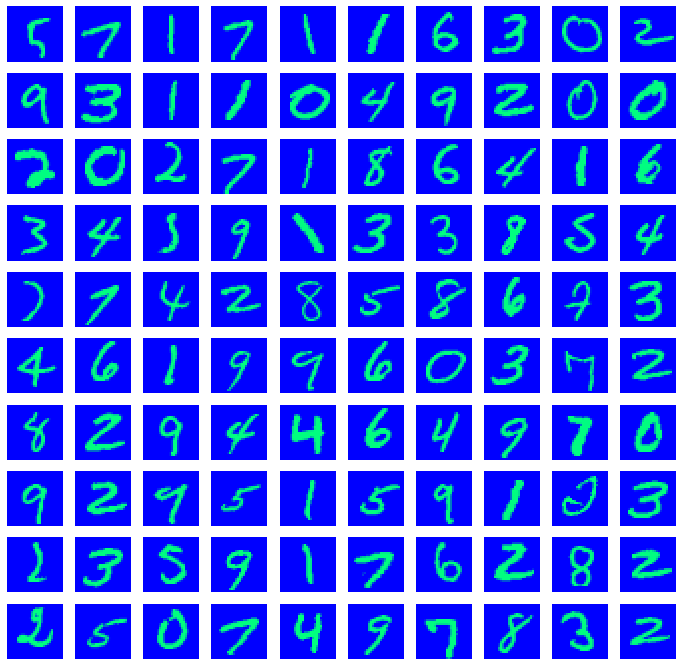

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(100,200):
  ax = plt.subplot(10, 10, i-99)
  plt.axis("off")
  plt.imshow(x_train_norm[i].reshape(28,28),interpolation='nearest')
  plt.winter()

### *1.3 - Create and Initialize LENET-5 Architecture*

The code bellow implements a single-hidden-layer perceptron using Keras functional architecture. 



In [ ]:
import tensorflow as tf

# Here it goes a functional implementation of a MLP
def mymlp_functional( hidd_neu = 128, hidd_act='relu',do_freq=0.2):
  inputs = tf.keras.layers.Input(shape=(28,28))
  x = tf.keras.layers.Flatten(input_shape=(28, 28))(inputs)
  x = tf.keras.layers.Dense(hidd_neu, activation=hidd_act) (x)
  x = tf.keras.layers.Dropout(do_freq) (x)
  outputs = tf.keras.layers.Dense(10, activation='softmax') (x)
  return tf.keras.models.Model(inputs, outputs, name='mymlp')


**Task 1** Implement using the Keras functional API the  [LENET-5 architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

Notice that the LETNET input layer size is 32 x 32 while MNIST images dimensions are 28 x 28. To solve such mismatch, include, after the input layer, a zeros padding layer to insert 2 zero-pixels at each border. Use [zero_padding2d](https://keras.io/api/layers/reshaping_layers/zero_padding2d/) layer function. Also, notice that the original LENET-5 has a Gaussian layer on its output, substitute it by a softmax layer. In addition, incorporate batch normalization and dropout to your implementation. For further information, consult [Keras layers API ](https://keras.io/api/layers/)   

In [6]:
import tensorflow as tf

def mylenet_functional( hidd_neu = 128, hidd_act='relu',do_freq=0.2):
  inputs = tf.keras.layers.Input(shape=(28,28,1))
  out = tf.keras.layers.ZeroPadding2D(padding=2)(inputs) 

  out = tf.keras.layers.Conv2D(filters=6,kernel_size=(5, 5),activation='tanh',input_shape=(32,32,1))(out)
  out = tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid')(out)
  out = tf.keras.layers.Conv2D(filters=16,kernel_size=(5, 5),activation='tanh',input_shape=(14,14,6))(out)
  out = tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid')(out)
  
  out = tf.keras.layers.Flatten()(out)  
  out = tf.keras.layers.Dense(120) (out)
  out = tf.keras.layers.BatchNormalization()(out)
  out = tf.keras.layers.Activation(hidd_act)(out)

  out = tf.keras.layers.Dense(84) (out)
  out = tf.keras.layers.BatchNormalization()(out)
  out = tf.keras.layers.Activation(hidd_act)(out)

  out = tf.keras.layers.Dropout(do_freq) (out)
  outputs = tf.keras.layers.Dense(10, activation='softmax') (out)
  return tf.keras.models.Model(inputs, outputs, name='mylenet_functional')

model = mylenet_functional()

**Task 2** Calculate the number of parameters of the above model. Compare the estimatad values to the one provided by 

```
Model.summary()
```



In [ ]:
#Use this space to answer Task 2
model.summary()

#References: 
#https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca
#https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739
#Input: 28*28*1
#The Flatten layer doesn’t learn anything, thus the number of parameters is 0.
#Bath normalization layer: For each input parameter, it generates 4 parameters (2 learnable(beta and gamma) and 2 non-learnable(mean, var))
#Convolutional layer: number of filters * (squared filter length * input channels + 1)
#Dense layer formula: param_number = output_channel_number * (input_channel_number + 1)

conv1_input_depth = 1
conv1_filter_size = 5 * 5
conv1_number_of_filters = 6
conv1_params = conv1_number_of_filters * ((conv1_filter_size * conv1_input_depth) + 1)

conv2_input_depth = 6
conv2_filter_size = 5 * 5
conv2_number_of_filters = 16
conv2_params = conv2_number_of_filters * ((conv2_filter_size * conv2_input_depth) + 1)

flatten = 5 * 5 * 16
dense_input = flatten
dense_neurons = 120
dense_params = dense_neurons * (dense_input + 1)
dense_batchNormLayer_params = dense_neurons * 4

dense1_input = dense_neurons
dense1_neurons = 84
dense1_params = dense1_neurons * (dense1_input + 1)
dense1_batchNormLayer_params = dense1_neurons * 4

dense2_input = 84 #previous layer output (dropout)
dense2_neurons = 10
dense2_params = dense2_neurons * (dense2_input + 1)

total_params = conv1_params + conv2_params + dense_params + dense_batchNormLayer_params + dense1_params + dense1_batchNormLayer_params + dense2_params

print("Conv1 count (computed): ", conv1_params)
print("Conv2 count (computed): ", conv2_params)
print("Dense count (computed): ", dense_params)
print("Batch count (computed): ", dense_batchNormLayer_params)
print("Dense1 count (computed): ", dense1_params)
print("Batch1 count (computed): ", dense1_batchNormLayer_params)
print("Dense2 count (computed): ", dense2_params)

print("Total parameters count (computed): ", total_params)

Model: "mylenet_functional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 32, 32, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)  

**Use this space to answer Task 2**

References: 

https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca

https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739

The Flatten layer doesn’t learn anything, thus the number of parameters is 0.

Batch normalization layer: For each input parameter, it generates 4 parameters (2 learnable(beta and gamma) and 2 non-learnable(mean, var))

Convolutional layer: number of filters * (squared filter length * input channels + 1)

Dense layer formula: param_number = output_channel_number * (input_channel_number + 1)

Summary:

Total params: 62,522

Trainable params: 62,114

Non-trainable params: 408

_________________________________________________________________


Conv1 count (computed):  156

Conv2 count (computed):  2416

Dense count (computed):  48120

Batch count (computed):  480

Dense1 count (computed):  10164

Batch1 count (computed):  336

Dense2 count (computed):  850

Total parameters count (computed):  62522



##*1.4 - Network training*

Remember the training process workflow:
1. Architecture setup
2. Network instantiation
3. Parameters initialization.
4. Training graph setup
5. Paramenters optimization
6. Evaluation 

Details can be found in the [keras documentation](https://keras.io/api/models/model_training_apis/). 

**Task 3**: Make a evaluation of the number of training epochs. Use that 'optimal' number of epochs in the remaining tasks.

In [ ]:
# Put you code here
model = mylenet_functional()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
EPOCHS = 25

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
H = model.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test), callbacks =[earlystopping])

#H = model.fit(x_train_norm, y_train, epochs=EPOCHS, validation_data=(x_test_norm,y_test))
#plot_history(H)

Epoch 1/25
1875/1875 [==============================] - 43s 22ms/step - loss: 0.2583 - accuracy: 0.9244 - val_loss: 0.1601 - val_accuracy: 0.9491
Epoch 2/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1062 - accuracy: 0.9683 - val_loss: 0.0748 - val_accuracy: 0.9751
Epoch 3/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0762 - accuracy: 0.9767 - val_loss: 0.0458 - val_accuracy: 0.9851
Epoch 4/25
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0610 - accuracy: 0.9813 - val_loss: 0.0450 - val_accuracy: 0.9844
Epoch 5/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0656 - val_accuracy: 0.9781
Epoch 6/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0419 - val_accuracy: 0.9853
Epoch 7/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0609 -

In [ ]:
for i,(val_accuracy,loss,val_loss) in enumerate(zip(H.history['val_accuracy'],H.history['loss'], H.history['val_loss'])):
  print(i+1,round(val_loss,3),round(val_loss-loss,3),round(val_accuracy,4))

1 0.16 -0.098 0.9491
2 0.075 -0.031 0.9751
3 0.046 -0.03 0.9851
4 0.045 -0.016 0.9844
5 0.066 0.014 0.9781
6 0.042 -0.004 0.9853
7 0.061 0.023 0.9805
8 0.032 -0.001 0.9898
9 0.042 0.012 0.988
10 0.036 0.009 0.989
11 0.037 0.011 0.9889
12 0.032 0.009 0.9909
13 0.037 0.016 0.9887
14 0.036 0.016 0.9891
15 0.033 0.013 0.9907
16 0.025 0.008 0.9915
17 0.043 0.026 0.9871
18 0.033 0.017 0.9904
19 0.035 0.02 0.9905
20 0.036 0.021 0.9897
21 0.04 0.027 0.9885


In [7]:
import matplotlib.pyplot as plt

def plot_history(H):
  plt.figure(figsize=(10, 10))
  plt.plot( H.history["loss"], label="train_loss")
  plt.plot( H.history["accuracy"], label="train_acc")
  plt.plot( H.history["val_loss"], label="validation_loss")
  plt.plot( H.history["val_accuracy"], label="validation_acc")

  plt.title("Loss / accuracy evolution")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss / Accuracy")
  plt.ylim([0, 1])
  leg=plt.legend()

Put your accuracy results for training and test data in a table inside the next cell. Remind the 'best' number of epochs. This value will be used in the following experiments. 

Epoch 8/25

1875/1875 [==============================] - 28s 15ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.0338 - val_accuracy: 0.9897

Considering validation_loss, training set loss and validation accuracy metrics, the model reaches its optimal results at epoch 8, when the difference between val_loss and loss is nearly zero and val_accuracy reaches a high score. After that, little improvement is seen on either metric.


**Task 4**: Train from the scratch a LENET-5 network through the previously  determined number of epochs 

In [ ]:
#Put your code for Task 4 here
EPOCHS = 8

model = mylenet_functional()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

H = model.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))

Epoch 1/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2547 - accuracy: 0.9260 - val_loss: 0.1017 - val_accuracy: 0.9689
Epoch 2/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1124 - accuracy: 0.9663 - val_loss: 0.0938 - val_accuracy: 0.9722
Epoch 3/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0766 - accuracy: 0.9771 - val_loss: 0.0588 - val_accuracy: 0.9798
Epoch 4/8
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0613 - accuracy: 0.9813 - val_loss: 0.0454 - val_accuracy: 0.9862
Epoch 5/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0510 - accuracy: 0.9837 - val_loss: 0.0486 - val_accuracy: 0.9855
Epoch 6/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 7/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0355 - val_ac

##*1.5 - Rigorous evaluation*
Tasks 5 to 10 will introduce yoursel to a more thorought evaluation of the network trained in **task 4**. It is a really important need for ensuring network quality.

**Task 5**: Obtain the test set [confusion matrix](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html) for the above trained network.

 

In [ ]:
#Put your code for Task 5 here
import numpy as np

predictions = model.predict(x_test_norm)
def getConfusionMatrix(predictions):
  predictions_vec = [(np.argmax(np.array(p))) for p in predictions]
  return np.array(tf.math.confusion_matrix(labels=y_test,predictions=predictions_vec))

conf_matrix_arr = getConfusionMatrix(predictions)
print(conf_matrix_arr)

[[ 974    1    1    0    0    1    1    0    1    1]
 [   0 1112   15    2    0    0    2    1    3    0]
 [   0    0 1029    1    0    0    0    1    1    0]
 [   0    0    3 1002    0    4    0    0    0    1]
 [   0    0    3    0  975    0    1    2    0    1]
 [   2    1    0    6    0  881    1    0    0    1]
 [   4    1    1    0    1    1  949    0    1    0]
 [   0    0   11    2    1    0    0 1011    2    1]
 [   3    0    3    2    0    3    0    2  959    2]
 [   0    0    1    4   10    3    0    2   13  976]]


**Task 6**: Present the [overall accuracy](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [ ]:
#Put your code for Task 6 here
def getOverallAcc(conf_matrix_arr):
  return np.trace(conf_matrix_arr) / np.sum(conf_matrix_arr)

print("Overall accuracy: ",round(getOverallAcc(conf_matrix_arr),3))

Overall accuracy:  0.987


**Task 7**: Present the [errors of omission and commission](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [ ]:
#Put your code for Task 7 here
#Omission - Type I Error:
def getOmission(conf_matrix_arr):
  return (conf_matrix_arr.sum(axis=0) - np.diagonal(conf_matrix_arr)) / conf_matrix_arr.sum(axis=0)  
  
#Comission - Type II Error:
def getComission(conf_matrix_arr):
  return (conf_matrix_arr.sum(axis=1) - np.diagonal(conf_matrix_arr)) / conf_matrix_arr.sum(axis=1)

omission = getOmission(conf_matrix_arr)
print("Omission: ",omission)
for i,val in enumerate(omission):
  print("Omission Class",i,": ","{:.2%}".format(val))

comission = getComission(conf_matrix_arr)
print("Comission: ",comission)
for i,val in enumerate(comission):
  print("Comission Class",i,": ","{:.2%}".format(val))

Omission:  [0.00915565 0.00269058 0.03561387 0.01668302 0.01215805 0.01343785
 0.00524109 0.00785083 0.02142857 0.00712106]
Omission Class 0 :  0.92%
Omission Class 1 :  0.27%
Omission Class 2 :  3.56%
Omission Class 3 :  1.67%
Omission Class 4 :  1.22%
Omission Class 5 :  1.34%
Omission Class 6 :  0.52%
Omission Class 7 :  0.79%
Omission Class 8 :  2.14%
Omission Class 9 :  0.71%
Comission:  [0.00612245 0.02026432 0.00290698 0.00792079 0.00712831 0.01233184
 0.00939457 0.01653696 0.01540041 0.03270565]
Comission Class 0 :  0.61%
Comission Class 1 :  2.03%
Comission Class 2 :  0.29%
Comission Class 3 :  0.79%
Comission Class 4 :  0.71%
Comission Class 5 :  1.23%
Comission Class 6 :  0.94%
Comission Class 7 :  1.65%
Comission Class 8 :  1.54%
Comission Class 9 :  3.27%


**Task 8**: Present [user's  and producer's accuracy](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [ ]:
#Put your code for Task 8 here
#Producer's accuracy:
def getProducersAcc(conf_matrix_arr):
  return np.diagonal(conf_matrix_arr) / conf_matrix_arr.sum(axis=0)

#Users's accuracy:
def getUsersAcc(conf_matrix_arr):
  return np.diagonal(conf_matrix_arr) / conf_matrix_arr.sum(axis=1)


producer = getProducersAcc(conf_matrix_arr)
print("Producer's accuracy: ",producer)
for i,val in enumerate(producer):
  print("Producer's accuracy Class",i,": ","{:.2%}".format(val))

user = getUsersAcc(conf_matrix_arr)
print("User's accuracy: ",user)
for i,val in enumerate(user):
  print("User's accuracy Class",i,": ","{:.2%}".format(val))

Producer's accuracy:  [0.99084435 0.99730942 0.96438613 0.98331698 0.98784195 0.98656215
 0.99475891 0.99214917 0.97857143 0.99287894]
Producer's accuracy Class 0 :  99.08%
Producer's accuracy Class 1 :  99.73%
Producer's accuracy Class 2 :  96.44%
Producer's accuracy Class 3 :  98.33%
Producer's accuracy Class 4 :  98.78%
Producer's accuracy Class 5 :  98.66%
Producer's accuracy Class 6 :  99.48%
Producer's accuracy Class 7 :  99.21%
Producer's accuracy Class 8 :  97.86%
Producer's accuracy Class 9 :  99.29%
User's accuracy:  [0.99387755 0.97973568 0.99709302 0.99207921 0.99287169 0.98766816
 0.99060543 0.98346304 0.98459959 0.96729435]
User's accuracy Class 0 :  99.39%
User's accuracy Class 1 :  97.97%
User's accuracy Class 2 :  99.71%
User's accuracy Class 3 :  99.21%
User's accuracy Class 4 :  99.29%
User's accuracy Class 5 :  98.77%
User's accuracy Class 6 :  99.06%
User's accuracy Class 7 :  98.35%
User's accuracy Class 8 :  98.46%
User's accuracy Class 9 :  96.73%


**Task 9**: Obtain the [Kappa]((http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html))

In [ ]:
#Put your code for Task 9 here
#Reference: https://towardsdatascience.com/cohens-kappa-9786ceceab58
#axis=0: columns
#axis=1: rows
def getKappa(conf_matrix_arr):
  p0 = getOverallAcc(conf_matrix_arr)
  pe = (conf_matrix_arr.sum(axis=1) / np.sum(conf_matrix_arr)) * (conf_matrix_arr.sum(axis=0) / np.sum(conf_matrix_arr))
  total_pe = np.sum(pe)
  return (p0 - total_pe) / (1 - total_pe)  

print("Kappa coefficient: ",getKappa(conf_matrix_arr))

Kappa coefficient:  0.985327982937778


**Task 10**: Initialize and train this model 10 times and take note of the values obtained at each round.

In [ ]:
#Put your code for Task 10 here
EPOCHS = 8
results = []
for i in range(10):
  modl = mylenet_functional()
  modl.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
  )
  modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
  preds = modl.predict(x_test_norm)  
  conf_matrx = getConfusionMatrix(preds)
  acc = getOverallAcc(conf_matrx)
  omiss = getOmission(conf_matrx)
  comiss = getComission(conf_matrx)
  prodcs = getProducersAcc(conf_matrx)
  usrs = getUsersAcc(conf_matrx)
  kappa = getKappa(conf_matrx)

  iteration = {'overall_accuracy':acc,'omission':omiss,'comission':comiss,'producers_acc':prodcs,'usrs_acc':usrs,'kappa':kappa}
  results.append(iteration)

Epoch 1/8
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2411 - accuracy: 0.9293 - val_loss: 0.1372 - val_accuracy: 0.9535
Epoch 2/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1037 - accuracy: 0.9683 - val_loss: 0.1100 - val_accuracy: 0.9635
Epoch 3/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0762 - accuracy: 0.9767 - val_loss: 0.0600 - val_accuracy: 0.9822
Epoch 4/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0600 - accuracy: 0.9811 - val_loss: 0.0445 - val_accuracy: 0.9871
Epoch 5/8
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0498 - accuracy: 0.9852 - val_loss: 0.0473 - val_accuracy: 0.9841
Epoch 6/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0424 - accuracy: 0.9866 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 7/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0536 - val_ac

In [ ]:
import pandas as pd

for i,r in enumerate(results):
  print("\nRound ",i+1)
  df = pd.DataFrame(r)
  print(df)


Round  1
   overall_accuracy  omission  comission  producers_acc  usrs_acc     kappa
0            0.9835  0.007143   0.007143       0.992857  0.992857  0.981661
1            0.9835  0.001832   0.039648       0.998168  0.960352  0.981661
2            0.9835  0.017291   0.008721       0.982709  0.991279  0.981661
3            0.9835  0.020468   0.004950       0.979532  0.995050  0.981661
4            0.9835  0.008386   0.036660       0.991614  0.963340  0.981661
5            0.9835  0.016741   0.012332       0.983259  0.987668  0.981661
6            0.9835  0.005274   0.015658       0.994726  0.984342  0.981661
7            0.9835  0.009747   0.011673       0.990253  0.988327  0.981661
8            0.9835  0.037186   0.016427       0.962814  0.983573  0.981661
9            0.9835  0.040307   0.008920       0.959693  0.991080  0.981661

Round  2
   overall_accuracy  omission  comission  producers_acc  usrs_acc     kappa
0            0.9758  0.002183   0.067347       0.997817  0.932653  0

Put your outcomes here in the form of an table.
 
See frame above. Each row (0-9) represents a class of digit. Overall accuracy and kappa coefficient metrics are aggregated for each whole training round whereas the other measures have one value for each class.  

*1.6 - Optimizers*

Evaluate the impact of optimizer's choice during training process.


**Task 11**: While using the same number of training epochs as before, vary the [optimizers](https://keras.io/api/optimizers/#available-optimizers). Save the training history for each training, then plot histories of both losses and accuracies in the training set. Also compare the training and test final accuracy values obtained using each optimizer.  

Click here for [tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) documentation. There you may find the following variants:

  * SGD
  * RMSprop
  * Adam
  * Adadelta
  * Adagrad
  * Adamax
  * Nadam
  * Ftrl
 



Epoch 1/8
1875/1875 [==============================] - 45s 23ms/step - loss: 0.4275 - accuracy: 0.8833 - val_loss: 0.1713 - val_accuracy: 0.9533
Epoch 2/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1939 - accuracy: 0.9459 - val_loss: 0.1074 - val_accuracy: 0.9695
Epoch 3/8
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1405 - accuracy: 0.9600 - val_loss: 0.0758 - val_accuracy: 0.9771
Epoch 4/8
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1117 - accuracy: 0.9679 - val_loss: 0.0622 - val_accuracy: 0.9811
Epoch 5/8
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0978 - accuracy: 0.9715 - val_loss: 0.0530 - val_accuracy: 0.9833
Epoch 6/8
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0878 - accuracy: 0.9743 - val_loss: 0.0483 - val_accuracy: 0.9860
Epoch 7/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0799 - accuracy: 0.9767 - val_loss: 0.0444 - val_ac

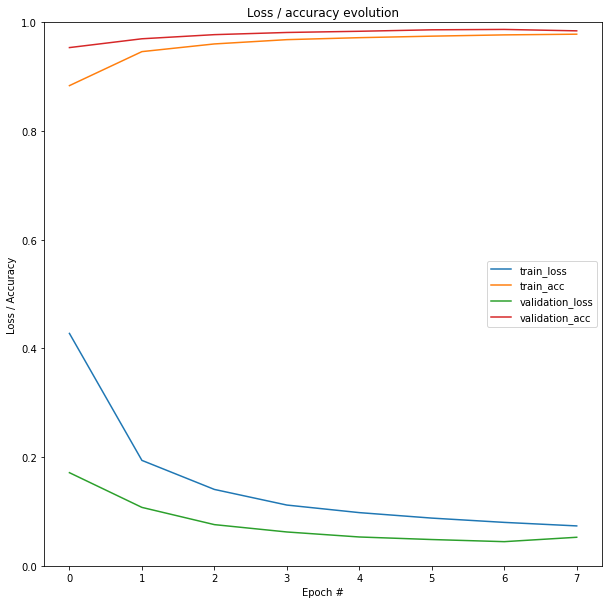

In [8]:
EPOCHS = 8

modl = mylenet_functional()
modl.compile(
   optimizer='SGD',
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'],
)
H1 = modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
plot_history(H1)

Epoch 1/8
1875/1875 [==============================] - 41s 21ms/step - loss: 0.2488 - accuracy: 0.9273 - val_loss: 0.1030 - val_accuracy: 0.9651
Epoch 2/8
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1171 - accuracy: 0.9649 - val_loss: 0.0738 - val_accuracy: 0.9751
Epoch 3/8
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0842 - accuracy: 0.9754 - val_loss: 0.0581 - val_accuracy: 0.9832
Epoch 4/8
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0658 - accuracy: 0.9810 - val_loss: 0.0696 - val_accuracy: 0.9814
Epoch 5/8
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0583 - accuracy: 0.9833 - val_loss: 0.0645 - val_accuracy: 0.9818
Epoch 6/8
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0524 - accuracy: 0.9850 - val_loss: 0.0548 - val_accuracy: 0.9879
Epoch 7/8
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0471 - accuracy: 0.9867 - val_loss: 0.0368 - val_ac

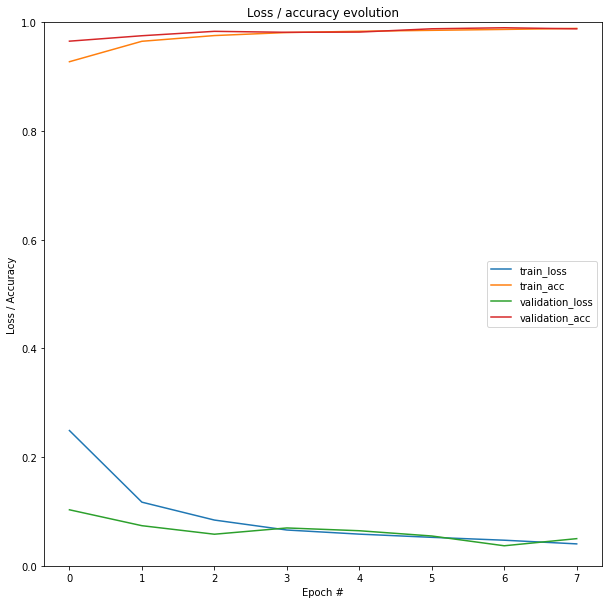

In [9]:
EPOCHS = 8

modl = mylenet_functional()
modl.compile(
   optimizer='RMSprop',
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'],
)
H2 = modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
plot_history(H2)

Epoch 1/8
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2542 - accuracy: 0.9257 - val_loss: 0.4238 - val_accuracy: 0.8642
Epoch 2/8
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1032 - accuracy: 0.9687 - val_loss: 0.0783 - val_accuracy: 0.9749
Epoch 3/8
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0630 - val_accuracy: 0.9793
Epoch 4/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0448 - val_accuracy: 0.9859
Epoch 5/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0669 - val_accuracy: 0.9773
Epoch 6/8
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0448 - accuracy: 0.9858 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 7/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0389 - val_ac

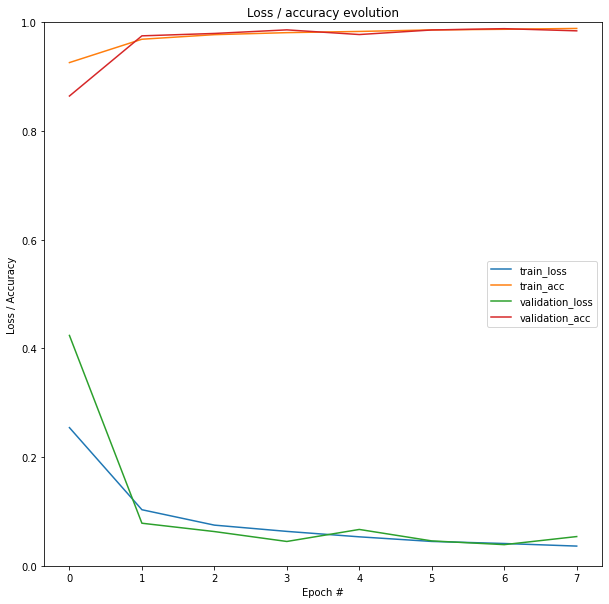

In [10]:
EPOCHS = 8

modl = mylenet_functional()
modl.compile(
   optimizer='Adam',
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'],
)
H3 = modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
plot_history(H3)

Epoch 1/8
1875/1875 [==============================] - 42s 22ms/step - loss: 2.4982 - accuracy: 0.1458 - val_loss: 2.1469 - val_accuracy: 0.2534
Epoch 2/8
1875/1875 [==============================] - 41s 22ms/step - loss: 2.0585 - accuracy: 0.2932 - val_loss: 1.7458 - val_accuracy: 0.4400
Epoch 3/8
1875/1875 [==============================] - 41s 22ms/step - loss: 1.7327 - accuracy: 0.4306 - val_loss: 1.4506 - val_accuracy: 0.5848
Epoch 4/8
1875/1875 [==============================] - 42s 23ms/step - loss: 1.5005 - accuracy: 0.5384 - val_loss: 1.2488 - val_accuracy: 0.6709
Epoch 5/8
1875/1875 [==============================] - 42s 23ms/step - loss: 1.3233 - accuracy: 0.6142 - val_loss: 1.0947 - val_accuracy: 0.7312
Epoch 6/8
1875/1875 [==============================] - 42s 22ms/step - loss: 1.1939 - accuracy: 0.6659 - val_loss: 0.9765 - val_accuracy: 0.7707
Epoch 7/8
1875/1875 [==============================] - 42s 22ms/step - loss: 1.0911 - accuracy: 0.7057 - val_loss: 0.8921 - val_ac

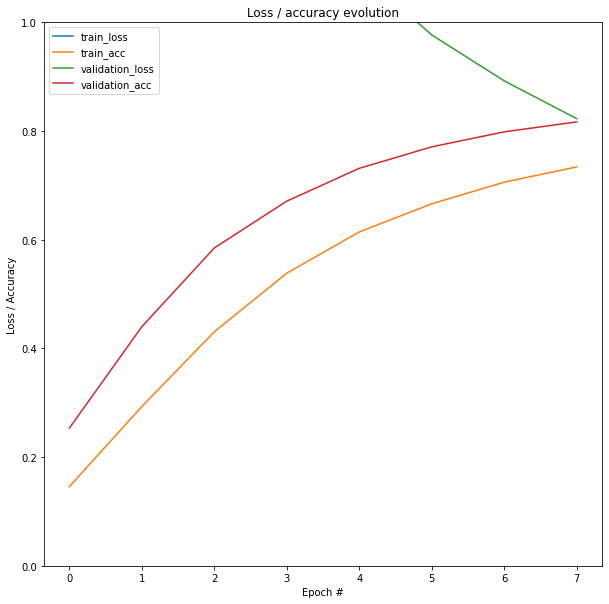

In [11]:
EPOCHS = 8

modl = mylenet_functional()
modl.compile(
   optimizer='Adadelta',
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'],
)
H4 = modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
plot_history(H4)

Epoch 1/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.7747 - accuracy: 0.7982 - val_loss: 0.3863 - val_accuracy: 0.9178
Epoch 2/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4547 - accuracy: 0.8881 - val_loss: 0.2968 - val_accuracy: 0.9323
Epoch 3/8
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3844 - accuracy: 0.9012 - val_loss: 0.2552 - val_accuracy: 0.9373
Epoch 4/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3455 - accuracy: 0.9101 - val_loss: 0.2294 - val_accuracy: 0.9424
Epoch 5/8
1875/1875 [==============================] - 42s 23ms/step - loss: 0.3221 - accuracy: 0.9161 - val_loss: 0.2136 - val_accuracy: 0.9466
Epoch 6/8
1875/1875 [==============================] - 42s 23ms/step - loss: 0.3047 - accuracy: 0.9186 - val_loss: 0.2006 - val_accuracy: 0.9493
Epoch 7/8
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2872 - accuracy: 0.9224 - val_loss: 0.1902 - val_ac

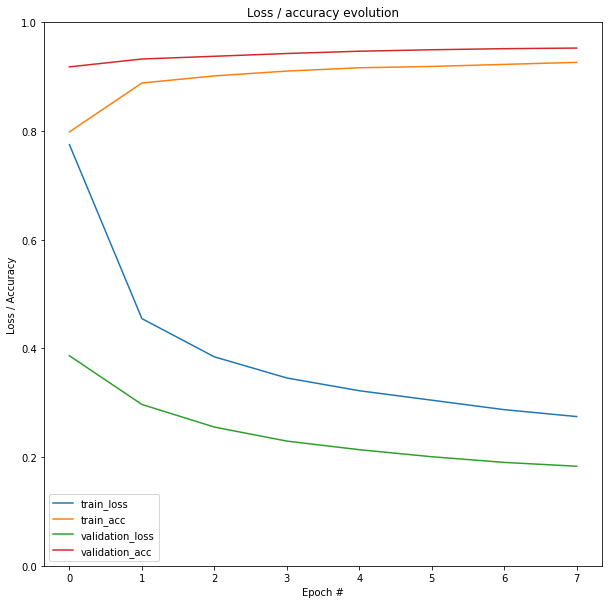

In [12]:
EPOCHS = 8

modl = mylenet_functional()
modl.compile(
   optimizer='Adagrad',
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'],
)
H5 = modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
plot_history(H5)

Epoch 1/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3468 - accuracy: 0.9055 - val_loss: 0.1475 - val_accuracy: 0.9577
Epoch 2/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1800 - accuracy: 0.9471 - val_loss: 0.1141 - val_accuracy: 0.9665
Epoch 3/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1410 - accuracy: 0.9591 - val_loss: 0.1145 - val_accuracy: 0.9676
Epoch 4/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1154 - accuracy: 0.9657 - val_loss: 0.0833 - val_accuracy: 0.9716
Epoch 5/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1013 - accuracy: 0.9698 - val_loss: 0.0841 - val_accuracy: 0.9745
Epoch 6/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0889 - accuracy: 0.9730 - val_loss: 0.0655 - val_accuracy: 0.9799
Epoch 7/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0813 - accuracy: 0.9750 - val_loss: 0.0630 - val_ac

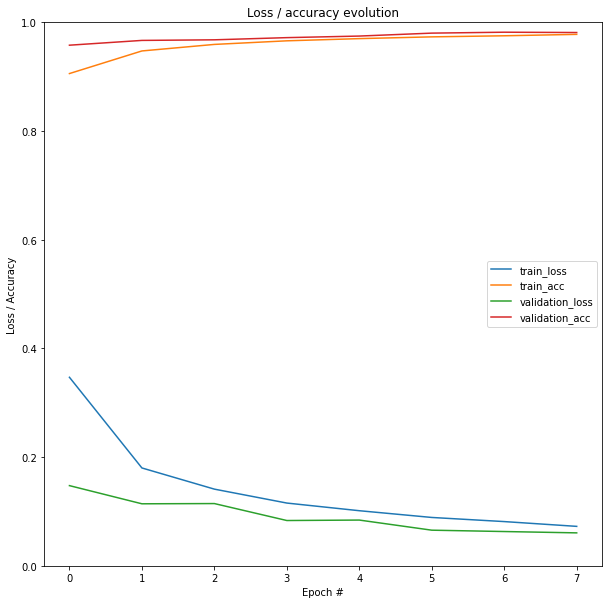

In [13]:
EPOCHS = 8

modl = mylenet_functional()
modl.compile(
   optimizer='Adamax',
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'],
)
H6 = modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
plot_history(H6)

Epoch 1/8
1875/1875 [==============================] - 41s 21ms/step - loss: 0.2535 - accuracy: 0.9263 - val_loss: 0.1008 - val_accuracy: 0.9694
Epoch 2/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1128 - accuracy: 0.9664 - val_loss: 0.0741 - val_accuracy: 0.9769
Epoch 3/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0811 - accuracy: 0.9755 - val_loss: 0.0473 - val_accuracy: 0.9850
Epoch 4/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.0875 - val_accuracy: 0.9731
Epoch 5/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0451 - val_accuracy: 0.9847
Epoch 6/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0363 - val_accuracy: 0.9886
Epoch 7/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.0380 - val_ac

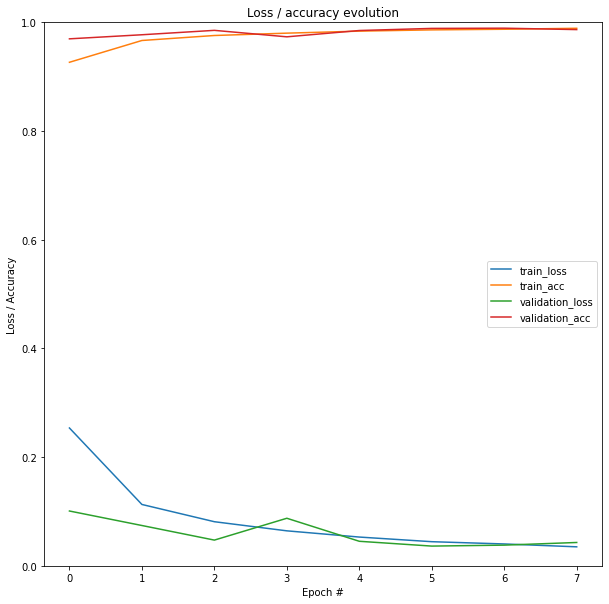

In [14]:
EPOCHS = 8

modl = mylenet_functional()
modl.compile(
   optimizer='Nadam',
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'],
)
H7 = modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
plot_history(H7)

Epoch 1/8
1875/1875 [==============================] - 43s 22ms/step - loss: 2.3027 - accuracy: 0.1122 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 2/8
1875/1875 [==============================] - 39s 21ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/8
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 4/8
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 5/8
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 6/8
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 7/8
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3017 - val_ac

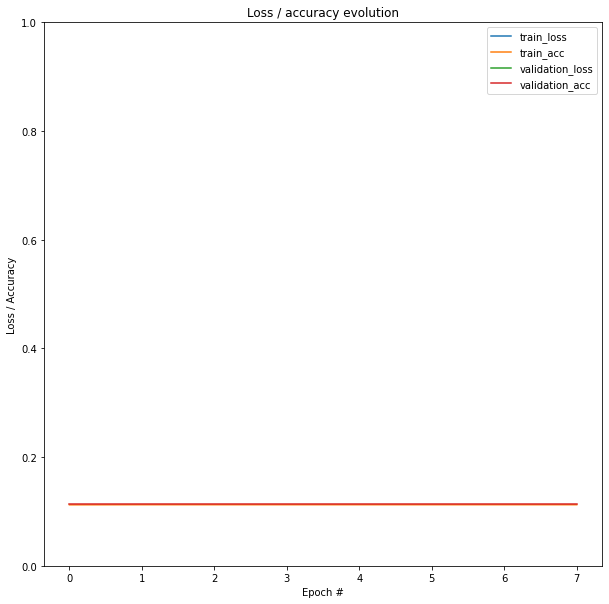

In [15]:
EPOCHS = 8

modl = mylenet_functional()
modl.compile(
   optimizer='Ftrl',
   loss='sparse_categorical_crossentropy',
   metrics=['accuracy'],
)
H8 = modl.fit(x_train_norm, y_train, epochs=EPOCHS,validation_data=(x_test_norm,y_test))
plot_history(H8)

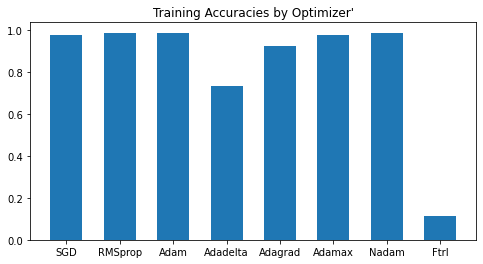

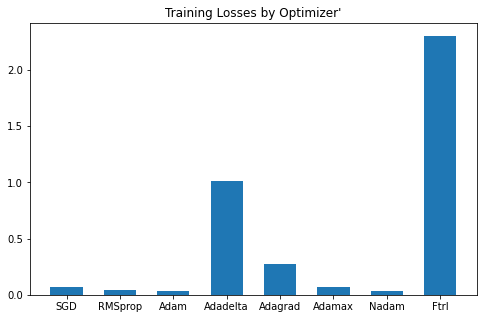

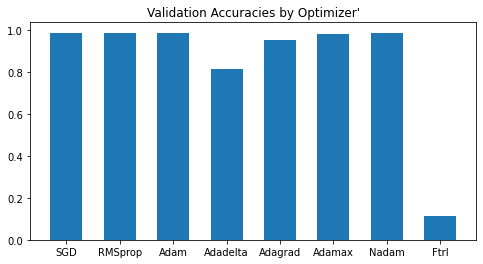

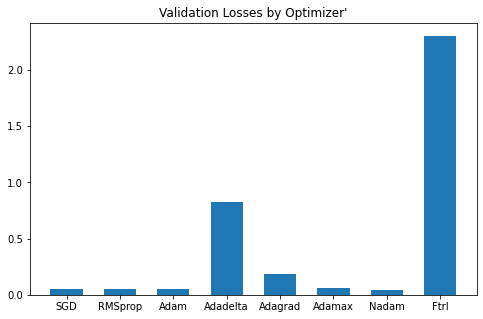

In [39]:
from matplotlib import pyplot as plt

accuracies = {
    'SGD':H1.history['accuracy'][-1],
    'RMSprop':H2.history['accuracy'][-1],
    'Adam':H3.history['accuracy'][-1],
    'Adadelta':H4.history['accuracy'][-1],
    'Adagrad':H5.history['accuracy'][-1],
    'Adamax':H6.history['accuracy'][-1],
    'Nadam':H7.history['accuracy'][-1],
    'Ftrl':H8.history['accuracy'][-1],
    }

losses = {
    'SGD':H1.history['loss'][-1],
    'RMSprop':H2.history['loss'][-1],
    'Adam':H3.history['loss'][-1],
    'Adadelta':H4.history['loss'][-1],
    'Adagrad':H5.history['loss'][-1],
    'Adamax':H6.history['loss'][-1],
    'Nadam':H7.history['loss'][-1],
    'Ftrl':H8.history['loss'][-1],
    }

val_accuracies = {
    'SGD':H1.history['val_accuracy'][-1],
    'RMSprop':H2.history['val_accuracy'][-1],
    'Adam':H3.history['val_accuracy'][-1],
    'Adadelta':H4.history['val_accuracy'][-1],
    'Adagrad':H5.history['val_accuracy'][-1],
    'Adamax':H6.history['val_accuracy'][-1],
    'Nadam':H7.history['val_accuracy'][-1],
    'Ftrl':H8.history['val_accuracy'][-1],
    }

val_losses = {
    'SGD':H1.history['val_loss'][-1],
    'RMSprop':H2.history['val_loss'][-1],
    'Adam':H3.history['val_loss'][-1],
    'Adadelta':H4.history['val_loss'][-1],
    'Adagrad':H5.history['val_loss'][-1],
    'Adamax':H6.history['val_loss'][-1],
    'Nadam':H7.history['val_loss'][-1],
    'Ftrl':H8.history['val_loss'][-1],
    }

plt.figure(figsize=(8,4))
plt.title("Training Accuracies by Optimizer'")
plt.bar(range(len(accuracies)),list(accuracies.values()),0.6)
plt.xticks(range(len(accuracies)), list(accuracies.keys()))
plt.show()

plt.figure(figsize=(8,5))
plt.title("Training Losses by Optimizer'")
plt.bar(range(len(losses)),list(losses.values()),0.6)
plt.xticks(range(len(losses)), list(losses.keys()))
plt.show()

plt.figure(figsize=(8,4))
plt.title("Validation Accuracies by Optimizer'")
plt.bar(range(len(val_accuracies)),list(val_accuracies.values()),0.6)
plt.xticks(range(len(val_accuracies)), list(val_accuracies.keys()))
plt.show()

plt.figure(figsize=(8,5))
plt.title("Validation Losses by Optimizer'")
plt.bar(range(len(val_losses)),list(val_losses.values()),0.6)
plt.xticks(range(len(val_losses)), list(val_losses.keys()))
plt.show()

Clearly Adadelta and Ftrl optimizers are not suitable for this model and type of problem. On the other hand, RMSprop and Adam have had the best overall performance considering loss and accuracy.